# Enzyme analysis

1. Convert the enzyme variant to amino acids based on the AAs and be warned about 1 vs 0 so need to check
2. Calculate concentration rather than yield (if yield is given then yield * mmol concentration)
3. Normalize to parent for each column (TTN, Yield)
4. Embeddings sequences
5. Convert to LevSeq format

In [1]:
import pandas as pd
import os

data_dir = '../data/'
df = pd.read_csv(os.path.join(data_dir, 'manual.csv'))
df

,culture_collection_entry,enzyme_name_from_paper,Uniprot_ID(if applicable),comment,reaction_smiles,parent_DNA_sequence,parent_aminoacid_sequence,aminoacid_mutations_from_parent,variant_DNA_sequence,mutations_from_parent,...,TTN (if applicable),"selectivity(ee%),diastereo or chemo should be a separate smiles entry",alternative_product_SMILES,failed_substrates (if available),date published,first author,paper title,doi,SUBMITTED BY,raw data name
0,?,P411-L1,?,3a,O=C1OCCC1=[N+]=[N-].CNC1=CC=CC=C1>>O=C1OCC[C@@...,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAP...,?,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,?,...,27.2,?,?,?,20211018.0,Zhen Liu,Dual-Function Enzyme Catalysis for Enantiosele...,https://doi.org/10.1038/s41557-021-00794-z,?,Asymmetric Carbene NH insertion 2021
1,?,P411-L2,?,3a,O=C1OCCC1=[N+]=[N-].CNC1=CC=CC=C1>>O=C1OCC[C@@...,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAP...,T327V,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,GTG,...,213,?,?,?,20211018.0,Zhen Liu,Dual-Function Enzyme Catalysis for Enantiosele...,https://doi.org/10.1038/s41557-021-00794-z,?,Asymmetric Carbene NH insertion 2021
2,?,P411-L3,?,3a,O=C1OCCC1=[N+]=[N-].CNC1=CC=CC=C1>>O=C1OCC[C@@...,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAP...,T327V_Q437L,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,GTG-CTT,...,288,?,?,?,20211018.0,Zhen Liu,Dual-Function Enzyme Catalysis for Enantiosele...,https://doi.org/10.1038/s41557-021-00794-z,?,Asymmetric Carbene NH insertion 2021
3,?,P411-L4,?,3a,O=C1OCCC1=[N+]=[N-].CNC1=CC=CC=C1>>O=C1OCC[C@@...,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAP...,T327V_S332A_Q437L,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,GTG-GCG-CTT,...,451,?,?,?,20211018.0,Zhen Liu,Dual-Function Enzyme Catalysis for Enantiosele...,https://doi.org/10.1038/s41557-021-00794-z,?,Asymmetric Carbene NH insertion 2021
4,?,P411-L5,?,3a,O=C1OCCC1=[N+]=[N-].CNC1=CC=CC=C1>>O=C1OCC[C@@...,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAP...,A87P_T327V_S332A_Q437L,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,CCG-GTG-GCG-CTT,...,1480,?,?,?,20211018.0,Zhen Liu,Dual-Function Enzyme Catalysis for Enantiosele...,https://doi.org/10.1038/s41557-021-00794-z,?,Asymmetric Carbene NH insertion 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,NaN,Rma-cyt-c-V75R_M100D_M103D,?,?,[BH3-]C1=[N+](C=CN1C)C.CC(C(OCC2=CC=CC=C2)=O)=...,ATGACTGAAAGCGGGACTGCTGCACAAGACCCGGAAGCACTGGCAG...,MTESGTAAQDPEALAAEIGPVKQVSLGEQIDAALAQQGEQLFNTYC...,V75R_M100D_M103D,?,?,...,4200,84%,?,?,20171207.0,S. B. Jennifer Kan,Genetically programmed chiral organoborane syn...,doi:10.1038/nature24996,?,NaN
1391,NaN,Rma-cyt-c-V75R_M100D_M103F,?,?,[BH3-]C1=[N+](C=CN1C)C.O=C(OCC)C(C(F)(F)F)=[N+...,ATGACTGAAAGCGGGACTGCTGCACAAGACCCGGAAGCACTGGCAG...,MTESGTAAQDPEALAAEIGPVKQVSLGEQIDAALAQQGEQLFNTYC...,V75R_M100D_M103F,?,?,...,1560,90%,?,?,20171207.0,S. B. Jennifer Kan,Genetically programmed chiral organoborane syn...,doi:10.1038/nature24996,?,NaN
1392,NaN,Rma-cyt-c-V75P_M99Y_M100D_T101A_M103F,?,?,[BH3-]C1=[N+](C=CN1C)C.O=C(OCC)C(C2=CC=CC=C2)=...,ATGACTGAAAGCGGGACTGCTGCACAAGACCCGGAAGCACTGGCAG...,MTESGTAAQDPEALAAEIGPVKQVSLGEQIDAALAQQGEQLFNTYC...,V75P_M99Y_M100D_T101A_M103F,?,?,...,340,88%,?,?,20171207.0,S. B. Jennifer Kan,Genetically programmed chiral organoborane syn...,doi:10.1038/nature24996,?,NaN
1393,NaN,Rma-cyt-c-V75P_M100D_Y71C_M89C_M99C,?,?,[BH3-]C1=[N+](C=CN1C)C.[N-]=[N+]=C(C2=CC=CC=C2...,ATGACTGAAAGCGGGACTGCTGCACAAGACCCGGAAGCACTGGCAG...,MTESGTAAQDPEALAAEIGPVKQVSLGEQIDAALAQQGEQLFNTYC...,V75P_M100D_Y71C_M89C_M99C,?,?,...,1010,92%,?,?,20171207.0,S. B. Jennifer Kan,Genetically programmed chiral organoborane syn...,doi:10.1038/nature24996,?,NaN


In [2]:
df.columns

Index(['culture_collection_entry', 'enzyme_name_from_paper',
       'Uniprot_ID(if applicable)', 'comment', 'reaction_smiles',
       'parent_DNA_sequence', 'parent_aminoacid_sequence',
       'aminoacid_mutations_from_parent', 'variant_DNA_sequence',
       'mutations_from_parent', 'cofactor', 'additive (if applicable)',
       'additive_CAS', 'enzyme_form', 'substrate_concentration',
       'activity_for_reaction_% (if applicable)', 'TTN (if applicable)',
       'selectivity(ee%),diastereo or chemo should be a separate smiles entry',
       'alternative_product_SMILES', 'failed_substrates (if available)',
       'date published ', 'first author', 'paper title', 'doi', 'SUBMITTED BY',
       'raw data name'],
      dtype='object')

# Iterate through the parent amino acid sequence and make the variant sequence 

Since sometimes people use 0 index and sometimes 1 index, first check the parent AA sequnece has the correct AA on the LHS.

In [3]:
from sciutil import SciUtil

u = SciUtil()

def convert_to_variant(parent, aa_to_change, verbose=False):
    warn = []
    error = []
    variant = []
    #try:
    variant = list(parent)
    parent = list(parent)
    sep = '_'
    # check what separator was used
    if '_' in aa_to_change:
        sep = '_'
    elif ',' in aa_to_change:
        sep = ','
    for aa in aa_to_change.split(sep):
        aa = aa.split('+')[0] # Remove any random domains... 
        try:
            parent_aa = aa[0]
            variant_aa = aa[-1]
            position = int(aa[1:-1])
            # Check the parent at the position is correct
            if parent[position] == parent_aa and parent[position - 1] == parent_aa : # Can't distinguish... since they are the same!
                if verbose:
                    u.warn_p(['Defaulting to 1 index since could not distinguish... warning to check sequence'])
                variant[position + 1] = variant_aa
                warn.append([aa, 'Warning: position 0 and 1 index had same AA used 1 index'])
            elif parent[position] == parent_aa: # 0 index
                variant[position] = variant_aa
            elif parent[position - 1] == parent_aa: # 1 index
                variant[position - 1] = variant_aa
            else:
                error.append([aa, 'Error in parent AA != AA in seq']) # Failed at this one we have an idea about where it was
        except Exception as e:
            error.append([aa, str(e)])
    # except:
    #     error.append([parent, 'Error: Parent missing'])
    #     warn.append(['Parent was missing?'])
    return ''.join(variant), warn, error
    
# Check these are the same since this is what we need
assert convert_to_variant('MTAKEMPQPKTFGELKNLPLLNTD', 'A2K')[0] == 'MTKKEMPQPKTFGELKNLPLLNTD' # 0 indexed example
assert convert_to_variant('MATKEMPQPKTFGELKNLPLLNTD', 'A2K')[0] == 'MKTKEMPQPKTFGELKNLPLLNTD' # 1 indexed
assert len(convert_to_variant('MAAKEMPQPKTFGELKNLPLLNTD', 'A2K')[1]) > 0 # Should print an error too 

In [6]:
from tqdm import tqdm 
from Bio.Seq import translate
import re

aas = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

reg = f"^[{''.join(aas)}]*$"

parent_aa = []
variant_aa = []
errors, warnings = [], []
changed = 0

for parent, parent_nt, aa_to_change, variant_nt in tqdm(df[['parent_aminoacid_sequence', 'parent_DNA_sequence', 'aminoacid_mutations_from_parent', 'variant_DNA_sequence']].values):
    if not parent or not isinstance(parent, str) or len(parent) < 2:
        # Try converting the parent nt
        if not parent_nt or not isinstance(parent_nt, str) or len(parent_nt) < 2:
            parent = None
            errors.append(['Parent was not string?'])
            warnings.append(['Parent was not string?'])
            parent_aa.append(None)
            continue
        parent_nt = parent_nt.replace(' ', '')
        parent = translate(parent_nt)
    parent = parent.replace(' ', '')
    parent = parent.strip()
    # We're replace his tags... 
    parent = parent.replace('LEHHHHHH', '').replace('HHHHHH', '').replace('*', '')
    # Check if the parent has any odd AAs
    if not re.match(reg, parent):
        # Parent has strange seqs..
        errors.append(['Parent had a non-correct AA in it.. check for numbers!'])
        variant_aa.append(None)
        warnings.append(None)
        parent_aa.append(parent)
        continue

    if aa_to_change != '?' and parent is not None:
        variant, warn, err = convert_to_variant(parent, aa_to_change)
        # Check if it got truncated 
        variant = variant.split('*')[0] # Truncate 
        variant_aa.append(variant)
        # if not re.match(reg, variant):
        #     # Parent has strange seqs..
        #     print('NO MATCH')
        #     break
        changed += 1
        if variant_aa == parent:
            print('Same?', aa_to_change)
        if len(warn) == 0: 
            warnings.append(None)
        else:
            warnings.append(warn)
        if len(err) == 0:
            errors.append(None)
        else:
            errors.append(err)
    else:
        variant_aa.append(None)
        errors.append(None)
        warnings.append(None)
    parent_aa.append(parent)


  0%|                                         | 0/1395 [00:00<?, ?it/s]/disk1/ariane/miniconda3/envs/protein/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
100%|███████████████████████████| 1395/1395 [00:00<00:00, 24976.97it/s]


In [8]:
df['parent_aa'] = parent_aa
#df['variant_aa'] = variant_aa
df['errors'] = errors
df['warnings'] = warnings

# Print out the number of errors
err_df = df[~df['errors'].isna()]
err_df['first author'].value_counts()

Andrew Zhou                200
Soumitra V. Athavale        96
Edwin Alfonzo               92
Runze Mao                   73
Zhen Liu                    44
Yang Yang                   43
Kai Chen                    41
Anuvab Das                  15
Daniel J. Wackelin          12
Nicholas S. Sarai           10
Ella J. Watkins-Dulaney      8
Oliver Brandenberg           6
Patrick J. Almhjell          6
Susanne Baehr                2
Ziyang Qin                   1
Nathaniel W. Goldberg        1
Name: first author, dtype: int64

In [9]:
df['first author'].value_counts()

Andrew Zhou                200
Soumitra V. Athavale       137
Runze Mao                  127
Edwin Alfonzo               97
Zhen Liu                    66
Juner Zhang                 66
Kai Chen                    54
ZhiJun Jia                  54
S. B. Jennifer Kan          51
Daniel J. Wackelin          50
Yang Yang                   43
Oliver Brandenberg          38
Ziyang Qin                  37
Deirdre Hanley              31
Nathaniel W. Goldberg       31
Ella J. Watkins-Dulaney     28
David Romney                27
Markus Dick                 27
Patrick J. Almhjell         26
Shilong Gao                 20
Carla Calvo-Tusell          19
Susanne Baehr               19
David C. Miller             18
Anuvab Das                  17
Nicholas J. Porter          14
Bruce J. Wittmann           13
Nicholas S. Sarai           12
Lucas Schaus                10
Ella J. Watkins              9
Name: first author, dtype: int64

In [12]:
df.columns

Index(['culture_collection_entry', 'enzyme_name_from_paper',
       'Uniprot_ID(if applicable)', 'comment', 'reaction_smiles',
       'parent_DNA_sequence', 'parent_aminoacid_sequence',
       'aminoacid_mutations_from_parent', 'variant_DNA_sequence',
       'mutations_from_parent', 'cofactor', 'additive (if applicable)',
       'additive_CAS', 'enzyme_form', 'substrate_concentration',
       'activity_for_reaction_% (if applicable)', 'TTN (if applicable)',
       'selectivity(ee%),diastereo or chemo should be a separate smiles entry',
       'alternative_product_SMILES', 'failed_substrates (if available)',
       'date published ', 'first author', 'paper title', 'doi', 'SUBMITTED BY',
       'raw data name', 'parent_aa', 'errors', 'warnings'],
      dtype='object')

In [14]:
err_df[['parent_aminoacid_sequence', 'parent_DNA_sequence', 'aminoacid_mutations_from_parent', 'variant_DNA_sequence', 'errors', 'paper title']].to_csv('output/protein_errors.csv')


In [192]:
len(err_df['parent_aa'].values[-1])

389

In [106]:
convert_to_variant(err_df['parent_aminoacid_sequence'].values[0].replace(' ', ''), 'A87P_A264S_V327P_S332A_Q437L')

('MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAPGRVTRYLSSQRLIKEACDESRFDKELSQGLKFLRDFLGDGLPTSWTHEKNWKKAHNILLPSFSQQAMKGYHASMVDIAVQLVQKWERLNADEHIEVSEDMTRLTLDTIGLCGFNYRLNSFYRDQPHPFIISLVRALDEVMNKLQRANPDDPAYDENKRQFQEDIKVMNDLVDKIIADRKARGEQSDDLLTQMLNGKDPETGEPLDDGNIRYQIITFLYSGVEGTSGLLSFALYFLVKNPHVLQKVAEEAARVLVDPVPSYKQVKQLKYVGMVLNEALRLWPTVPYFALYAKEDTVLGGEYPLEKGDEVMVLIPQLHRDKTVWGDDVEEFRPERFENPSAIPQHAFKPFGNGQRASLGQQFALHEATLVLGMMLKHFDFEDHTNYELDIKELLTLKPKGFVVKAKSKKIPLGGIPSPSTEQSAKKVRKKAENAHNTPLLVLYGSNMGTAEGTARDLADIAMSKGFAPQVATLDSHAGNLPREGAVLIVTASYNGHPPDNAKQFVDWLDQASADEVKGVRYSVFGCGDKNWATTYQKVPAFIDETLAAKGAENIADRGEADASDDFEGTYEEWREHMWSDVAAYFNLDIENSEDNKSTLSLQFVDSAADMPLAKMHGAFSTLEHHHHHH',
 [],
 [['V327P', 'Error in parent AA != AA in seq']])

In [116]:
convert_to_variant(err_df['parent_aminoacid_sequence'].values[0].replace(' ', ''), 'A87P_A264S_V327P_S332A_Q437L')

('MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAPGRVTRYLSSQRLIKEACDESRFDKELSQGLKFLRDFLGDGLPTSWTHEKNWKKAHNILLPSFSQQAMKGYHASMVDIAVQLVQKWERLNADEHIEVSEDMTRLTLDTIGLCGFNYRLNSFYRDQPHPFIISLVRALDEVMNKLQRANPDDPAYDENKRQFQEDIKVMNDLVDKIIADRKARGEQSDDLLTQMLNGKDPETGEPLDDGNIRYQIITFLYSGVEGTSGLLSFALYFLVKNPHVLQKVAEEAARVLVDPVPSYKQVKQLKYVGMVLNEALRLWPTVPYFALYAKEDTVLGGEYPLEKGDEVMVLIPQLHRDKTVWGDDVEEFRPERFENPSAIPQHAFKPFGNGQRASLGQQFALHEATLVLGMMLKHFDFEDHTNYELDIKELLTLKPKGFVVKAKSKKIPLGGIPSPSTEQSAKKVRKKAENAHNTPLLVLYGSNMGTAEGTARDLADIAMSKGFAPQVATLDSHAGNLPREGAVLIVTASYNGHPPDNAKQFVDWLDQASADEVKGVRYSVFGCGDKNWATTYQKVPAFIDETLAAKGAENIADRGEADASDDFEGTYEEWREHMWSDVAAYFNLDIENSEDNKSTLSLQFVDSAADMPLAKMHGAFSTLEHHHHHH',
 [],
 [['V327P', 'Error in parent AA != AA in seq']])

# Continue with people who had no errors...


In [124]:
! pip install enzymetk

# First clean and drop duplicates before we move across



In [195]:
# Do ESM embedding of the ones that look good!
import sys
sys.path.append('/disk1/ariane/vscode/enzyme-tk')
from enzymetk.embedprotein_esm_step import EmbedESM
from enzymetk.save_step import Save
import pandas as pd

df['id'] = [f'DEDB{i}' for i in range(0, len(df))]
df = df[df['errors'].isna()]
variant_df = df[~df['variant_aa'].isna()] # Remove any that didn't have variants
variant_df = variant_df.drop_duplicates(subset=['variant_aa']) # Remove any that didn't have variants

variant_df['variant_id'] = [f'VDEDB{i}' for i in range(0, len(variant_df))]
variant_df['variant_aa_nohis'] = [s.replace('LEHHHHHH', '').replace('HHHHHH', '').replace('*', '') for s in variant_df['variant_aa'].values]

# Hmmm there are too many duplicates (need to check if this is from 
id_col = 'variant_id'
seq_col = 'variant_aa_nohis'


embedding_df = (variant_df << (EmbedESM(id_col, seq_col, extraction_method='mean', tmp_dir='tmp/') >> Save('output/variant_df_no_errors.pkl')))

/tmp/ipykernel_1960387/156216925.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = [f'DEDB{i}' for i in range(0, len(df))]


--------------------------------------------------------------------------------
Running command	conda run -n enzymetk python /disk1/ariane/vscode/enzyme-tk/enzymetk/esm-extract.py esm2_t33_650M_UR50D tmp//input.fasta tmp/ --include per_tok	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------
Transferred model to GPU
Read tmp/input.fasta with 85 sequences
Processing 1 of 18 batches (17 sequences)
Processing 2 of 18 batches (8 sequences)
Processing 3 of 18 batches (6 sequences)
Processing 4 of 18 batches (6 sequences)
Processing 5 of 18 batches (6 sequences)
Processing 6 of 18 batches (6 sequences)
Processing 7 of 18 batches (3 sequences)
Processing 8 of 18 batches (3 sequences)
Processing 9 of 18 batches (3 sequences)


100%|██████████████████████████████████████| 201/201 [00:00<00:00, 687.41it/s]

0 0 0


# Plot the embeddings as a PCA or TSNE

Colour by various things like author etc 

In [204]:
len(embedding_df['paper title'].value_counts()), len(embedding_df['first author'].value_counts())

(33, 27)

In [225]:
embedding_df.columns

Index(['culture_collection_entry', 'enzyme_name_from_paper',
       'Uniprot_ID(if applicable)', 'comment', 'reaction_smiles',
       'parent_DNA_sequence', 'parent_aminoacid_sequence',
       'aminoacid_mutations_from_parent', 'variant_DNA_sequence',
       'mutations_from_parent', 'cofactor', 'additive (if applicable)',
       'additive_CAS', 'enzyme_form', 'substrate_concentration',
       'activity_for_reaction_% (if applicable)', 'TTN (if applicable)',
       'selectivity(ee%),diastereo or chemo should be a separate smiles entry',
       'alternative_product_SMILES', 'failed_substrates (if available)',
       'date published ', 'first author', 'paper title', 'doi', 'SUBMITTED BY',
       'raw data name', 'parent_aa', 'variant_aa', 'errors', 'warnings', 'id',
       'variant_id', 'variant_aa_nohis', 'embedding', 'PCA1', 'PCA2'],
      dtype='object')

array([0.514717  , 0.23898697], dtype=float32)

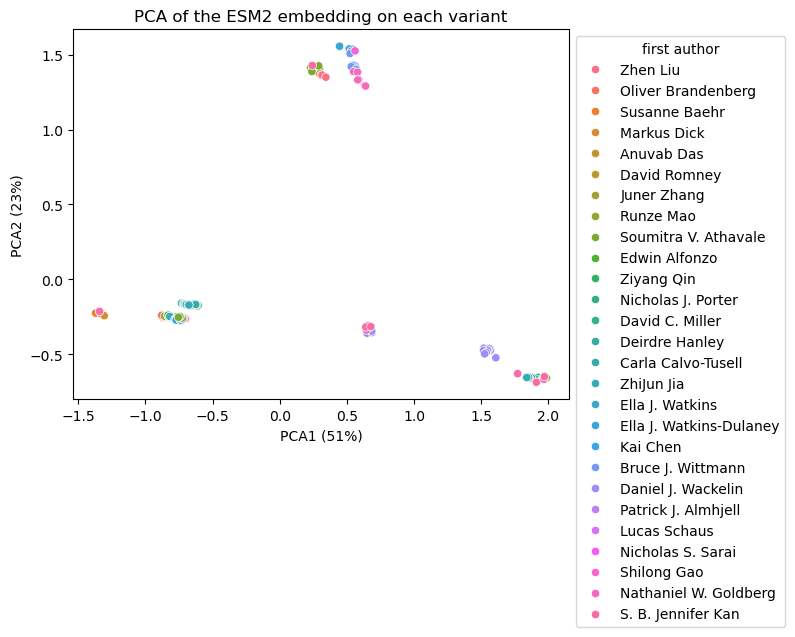

In [236]:
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X = np.array([x for x in embedding_df['embedding'].values]).reshape((len(embedding_df), 1280))

pca_values = pca.fit_transform(X)
embedding_df['PCA1'] = pca_values[:, 0]
embedding_df['PCA2'] = pca_values[:, 1]

ax = sns.scatterplot(embedding_df, x='PCA1', y='PCA2', hue='first author')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel(f'PCA1 ({int(pca.explained_variance_ratio_[0]*100)}%)')
plt.ylabel(f'PCA2 ({int(pca.explained_variance_ratio_[1]*100)}%)')
plt.title('PCA of the ESM2 embedding on each variant')

## Look at this compared to natural enzymes 

Text(0.5, 1.0, 'PCA of the ESM2 embedding on each variant')

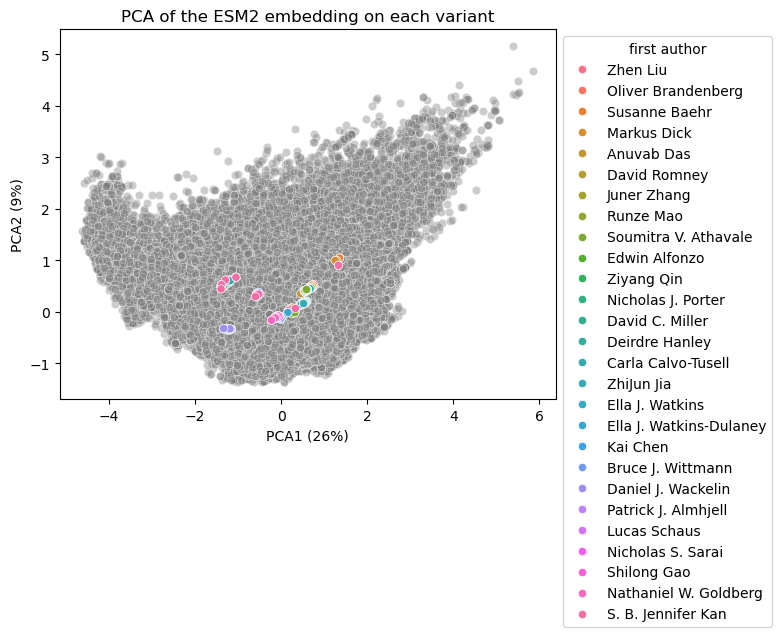

In [262]:


protein_df = pd.read_pickle('/disk1/ariane/vscode/cec_degrader/manuscript/protein.pkl')
protein_df['first author'] = 'Natural'
protein_df.rename(columns={'esm_embedding': 'embedding'}, inplace=True)

all_rxns = pd.concat([embedding_df, protein_df])
pca = PCA(n_components=2)
X = np.array([x for x in all_rxns['embedding'].values]).reshape((len(all_rxns), len(all_rxns['embedding'].values[0])))
pca_values = pca.fit_transform(X)
all_rxns['PCA1'] = pca_values[:, 0]
all_rxns['PCA2'] = pca_values[:, 1]

ax = sns.scatterplot(all_rxns[all_rxns['first author'] == 'Natural'], x='PCA1', y='PCA2', color='grey', alpha=0.4)
ax = sns.scatterplot(all_rxns[all_rxns['first author'] != 'Natural'], x='PCA1', y='PCA2', hue='first author')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel(f'PCA1 ({int(pca.explained_variance_ratio_[0]*100)}%)')
plt.ylabel(f'PCA2 ({int(pca.explained_variance_ratio_[1]*100)}%)')
plt.title('PCA of the ESM2 embedding on each variant')

In [259]:
all_rxns

,culture_collection_entry,enzyme_name_from_paper,Uniprot_ID(if applicable),comment,reaction_smiles,parent_DNA_sequence,parent_aminoacid_sequence,aminoacid_mutations_from_parent,variant_DNA_sequence,mutations_from_parent,...,EC number,Residue_0index,Residue_1index,active_site_residue_counts,Polarity,temperature,Length,Mass,active_embedding,esm_embedding
1,?,P411-L2,?,3a,O=C1OCCC1=[N+]=[N-].CNC1=CC=CC=C1>>O=C1OCC[C@@...,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAP...,T327V,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,GTG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,?,P411-L3,?,3a,O=C1OCCC1=[N+]=[N-].CNC1=CC=CC=C1>>O=C1OCC[C@@...,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAP...,T327V_Q437L,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,GTG-CTT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,?,P411-L4,?,3a,O=C1OCCC1=[N+]=[N-].CNC1=CC=CC=C1>>O=C1OCC[C@@...,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAP...,T327V_S332A_Q437L,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,GTG-GCG-CTT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,?,P411-L5,?,3a,O=C1OCCC1=[N+]=[N-].CNC1=CC=CC=C1>>O=C1OCC[C@@...,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAP...,A87P_T327V_S332A_Q437L,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,CCG-GTG-GCG-CTT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,?,P411-L6,?,3a,O=C1OCCC1=[N+]=[N-].CNC1=CC=CC=C1>>O=C1OCC[C@@...,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAP...,A87P_A264S_T327V_S332A_Q437L,ATGACAATTAAAGAAATGCCTCAGCCAAAAACGTTTGGAGAGCTTA...,CCG-AGT-GTG-GCG-CTT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.-.-.-,NaN,NaN,0.0,0.0,27.0,428.0,46848.0,[],"[-0.026072642, 0.0077691125, -0.01714752, 0.00..."
261250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.1.1.-,NaN,NaN,0.0,0.0,30.0,226.0,25746.0,[],"[0.05820916, -0.0050475453, 0.031664737, 0.065..."
261251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.13.11.-,NaN,NaN,0.0,0.0,30.0,208.0,23986.0,[],"[0.047606036, -0.01232071, 0.07216981, 0.01898..."
261252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4.-.-,NaN,NaN,0.0,0.0,30.0,318.0,36867.0,[],"[0.037483685, -0.05838441, -0.040710874, 0.078..."


# Convert to concentration from yield

If activity is reported, convert with the substrate concentration to the activity_for_reaction_% (if applicable) otherwise multiply TTN.

In [256]:
def convert_to_yield(df, activity_col, substrate_conc_col):
    calc_yield = []
    errors = []
    for activity, substrate_mol in df[[activity_col, substrate_conc_col]].values:
        if substrate_mol:
            # Convert the substrate concentration to molar
            if 'mM' in substrate_mol:
                substrate_mol = float(substrate_mol.split('mM')[0].replace(' ', '')) * (10**(-3)) # divide by 1000
            elif 'nM' in substrate_mol:
                substrate_mol = float(substrate_mol.split('nM')[0].replace(' ', '')) * (10**(-9)) # divide by 10-9
            elif 'uM' in substrate_mol:
                substrate_mol = float(substrate_mol.split('uM')[0].replace(' ', '')) * (10**(-6)) # divide by 1000
            elif 'M' in substrate_mol:
                substrate_mol = float(substrate_mol.split('M').replace(' ', ''))
            else:
                substrate_mol = None
                calc_yield.append(None)
                errors.append(f'substrate mol had no concentrations, {substrate_mol}')
                continue
        else:
            calc_yield.append(None)
            errors.append(f'No mol: {substrate_mol}')
            continue
        if activity != '?':
            # If had `<` or `>` we just remove
            if '>' in activity or '<' in activity:
                activity = activity.replace('>', '')
                activity = activity.replace('<', '')
                errors.append('Had a > or <')
            elif activity == 'trace':
                activity = 0.0001
                errors.append('Trace activity, used 0.0001')
            else:
                errors.append(None)
            activity = float(activity)
            calc_yield.append(activity*substrate_mol)
        else:
            errors.append(f'No activity, {substrate_mol}')
            calc_yield.append(None)
    return calc_yield, errors

calc_yield, errors = convert_to_yield(df, 'activity_for_reaction_% (if applicable)', 'substrate_concentration')
df['yield_from_activity'] = calc_yield
df['errors_from_activity'] = errors

calc_yield, errors = convert_to_yield(df, 'TTN (if applicable)', 'substrate_concentration')
df['yield_from_TTN'] = calc_yield
df['TTN_errors'] = errors